# Cleaning Up Star Wars Survey Data
## Introuction
First we look at all the preliminary basic information.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Remove any rows where RespondentID is Nan, but we save the first row into headers first for a list of names we will use later.

In [4]:
header = star_wars.iloc[0,:]
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

## Convert Yes/No to True/False

In [5]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
yes_no = {
    "Yes": True,
    "No": False,
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Clean Up the "Seen" Movie Columns

In [8]:
import numpy as np

movie_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_map)

star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Clean Up the "Ranking" Movie Columns

In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Find the Highest Ranked Movie Using Mean

In [10]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<Container object of 6 artists>

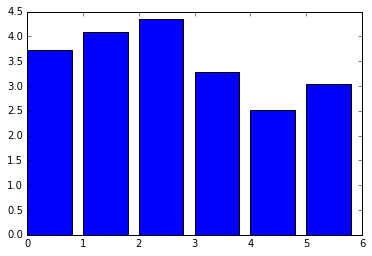

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

A lower bar means a higher ranking, so we can see the general consensus being the first three movies in the saga (4-6) are better ranked than the next three (1-3). This is not very surprising since the opinion that the first trilogy is better than the second trilogy is actually a pretty popular opinion in pop culture.

## Charting the Seen Columns Summed

In [12]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

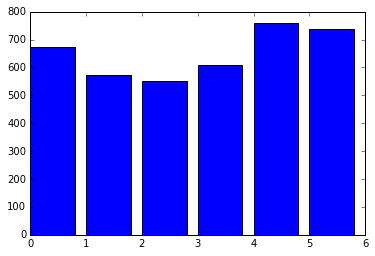

In [13]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

Here, it looks like the first 3 movies were seen by people generally more than the next 3, which reinforces our conclusion above. Movies that are generally viewed as "better" would likely to have a higher view count. Out of pure speculation, we can maybe infer that the high view count for Episode I comes from the expectations of the first 3 movies (4-6), and once it was deemed inferior the counts starting dropping for Episodes II and III.

## Splitting Seen Counts/Rankings Further by Groups
## Males vs. Females

In [14]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

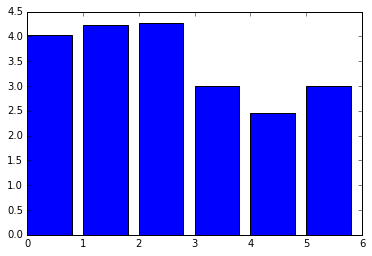

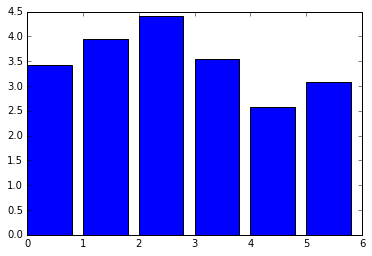

In [15]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

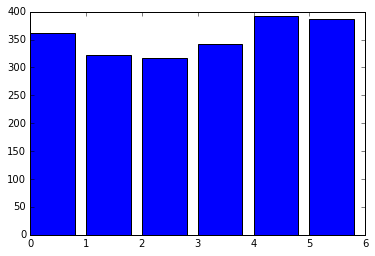

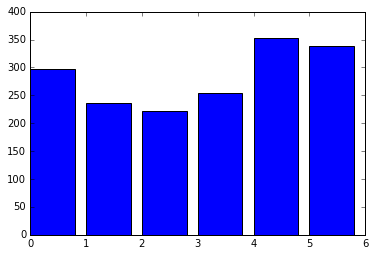

In [16]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.

## Star Wars Fans vs. Non-Fans

In [17]:
star_wars_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
star_wars_non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

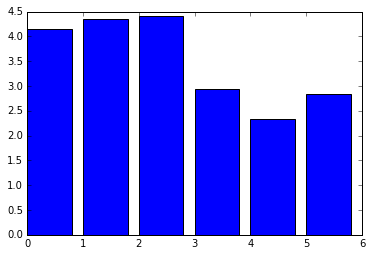

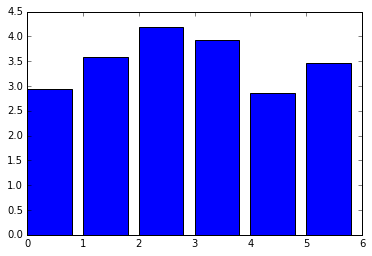

In [18]:
plt.bar(range(6), star_wars_fans[star_wars_fans.columns[9:15]].mean())
plt.show()

plt.bar(range(6), star_wars_non_fans[star_wars_non_fans.columns[9:15]].mean())
plt.show()

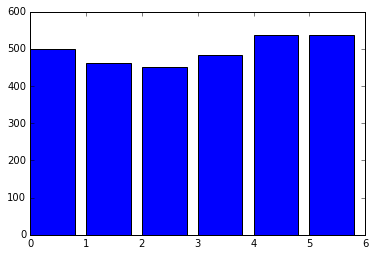

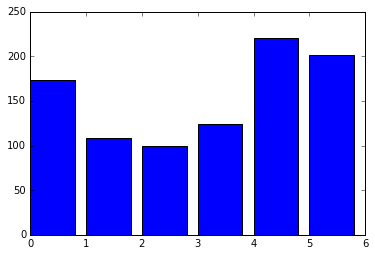

In [19]:
plt.bar(range(6), star_wars_fans[star_wars_fans.columns[3:9]].sum())
plt.show()

plt.bar(range(6), star_wars_non_fans[star_wars_non_fans.columns[3:9]].sum())
plt.show()

Obviously, non-fans' view counts will be much lower than fans, but we also see that non-fans' ratings of Episodes I, II, and III are much more forgiving, which is expected.

## Star Trek Fans vs. Non-Fans

In [20]:
star_trek_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_trek_non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

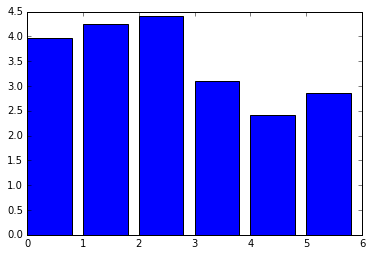

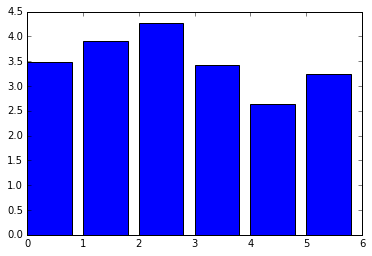

In [21]:
plt.bar(range(6), star_trek_fans[star_trek_fans.columns[9:15]].mean())
plt.show()

plt.bar(range(6), star_trek_non_fans[star_trek_non_fans.columns[9:15]].mean())
plt.show()

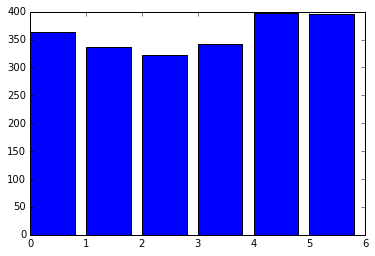

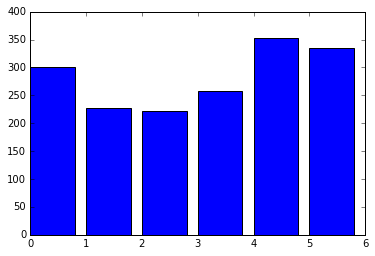

In [22]:
plt.bar(range(6), star_trek_fans[star_trek_fans.columns[3:9]].sum())
plt.show()

plt.bar(range(6), star_trek_non_fans[star_trek_non_fans.columns[3:9]].sum())
plt.show()

Being a fan of Star Trek might be correlated with being a fan of Star Wars, so viewership is more in the Star Trek fan group, as expected. Ratings of the Star Wars films themselves saw no real difference whether you were a fan of Star Trek or not, however, which is also not surprising since there wouldn't be an expected correlation there.

## Further Analysis
## Segmenting Based on Education, Location, and "Which character shot first?"

In [23]:
star_wars["Education"].unique()

array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

We can split the education up into each degree and display each plot like above, but we'll group them together here to save redundancy, maybe something like college degrees vs. non-college, ignoring NaN values.

In [24]:
college = star_wars[(star_wars["Education"] == "Bachelor degree") | (star_wars["Education"] == "Some college or Associate degree") | (star_wars["Education"] == "Graduate degree")]
non_college = star_wars[(star_wars["Education"] == "High school degree") | (star_wars["Education"] == "Less than high school degree")]

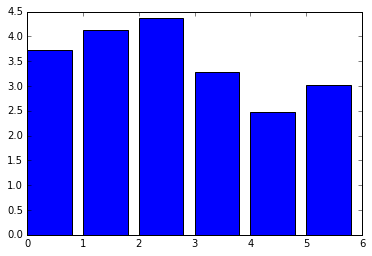

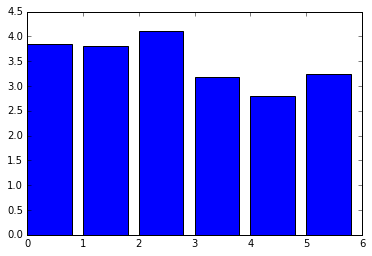

In [25]:
plt.bar(range(6), college[college.columns[9:15]].mean())
plt.show()

plt.bar(range(6), non_college[non_college.columns[9:15]].mean())
plt.show()

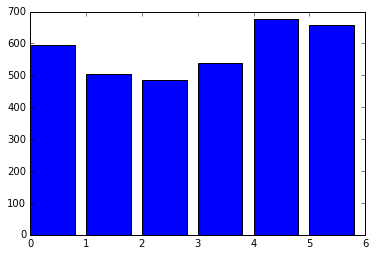

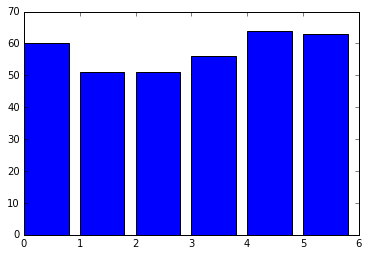

In [26]:
plt.bar(range(6), college[college.columns[3:9]].sum())
plt.show()

plt.bar(range(6), non_college[non_college.columns[3:9]].sum())
plt.show()

It seems although ratings do not differ, it is much more likely that a college graduate has seen the films than a non-college graduate. This could be due to a number of factors however, such as what if this survey was given on a college campus (It wasn't, but what if)? It is important not to jump to conclusions. Next, we can group location the same way.

In [27]:
star_wars["Location (Census Region)"].unique()

array(['South Atlantic', 'West South Central', 'West North Central',
       'Middle Atlantic', 'East North Central', 'Pacific', nan,
       'Mountain', 'New England', 'East South Central'], dtype=object)

Let's try to fit these groups into east coast vs. west coast as best as possible, again ignoring NaN.

In [28]:
east = star_wars[(star_wars["Location (Census Region)"] == "South Atlantic") | (star_wars["Location (Census Region)"] == "Middle Atlantic") | (star_wars["Location (Census Region)"] == "East North Central") | (star_wars["Location (Census Region)"] == "New Enland") | (star_wars["Location (Census Region)"] == "East South Central")]
west = star_wars[(star_wars["Location (Census Region)"] == "West South Central") | (star_wars["Location (Census Region)"] == "West North Central") | (star_wars["Location (Census Region)"] == "Pacific") | (star_wars["Location (Census Region)"] == "Mountain")]

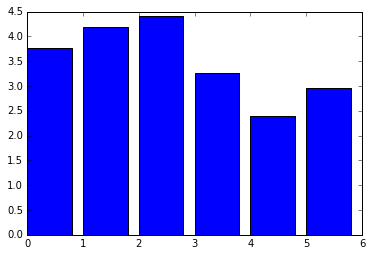

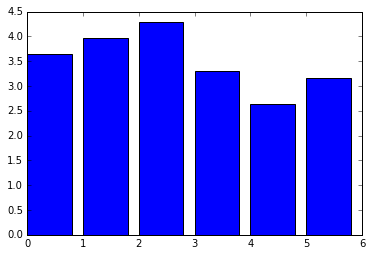

In [29]:
plt.bar(range(6), east[east.columns[9:15]].mean())
plt.show()

plt.bar(range(6), west[west.columns[9:15]].mean())
plt.show()

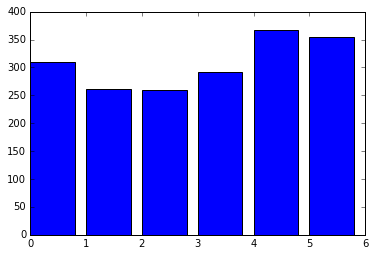

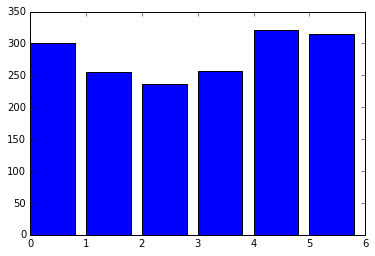

In [30]:
plt.bar(range(6), east[east.columns[3:9]].sum())
plt.show()

plt.bar(range(6), west[west.columns[3:9]].sum())
plt.show()

No significance here, as expected...No reason location sould determine this.

In [31]:
star_wars["Which character shot first?"].unique()

array(["I don't understand this question", nan, 'Greedo', 'Han'],
      dtype=object)

This question will certainly be interesting to explore. We will ignore "I don't understand" along with NaN, which turns Greedo and Han into binary choices. We could've included not understanding, but it seems like not understanding the quetion would probably just mean that the answerer is a casual fan, which we already explored. Greedo vs. Han explores more in depth the "fan" group which we had before.

In [32]:
greedo = star_wars[star_wars["Which character shot first?"] == "Greedo"]
han = star_wars[star_wars["Which character shot first?"] == "Han"]

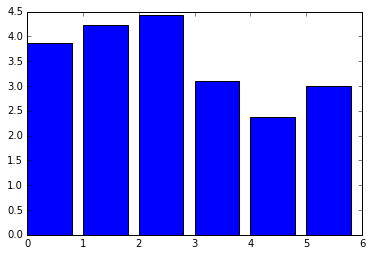

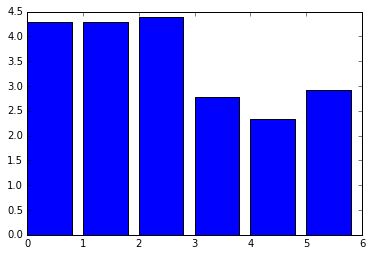

In [33]:
plt.bar(range(6), greedo[greedo.columns[9:15]].mean())
plt.show()

plt.bar(range(6), han[han.columns[9:15]].mean())
plt.show()

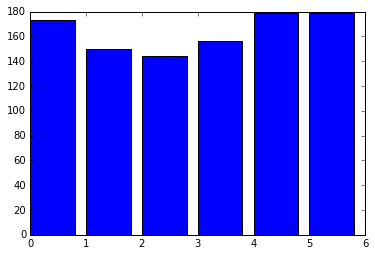

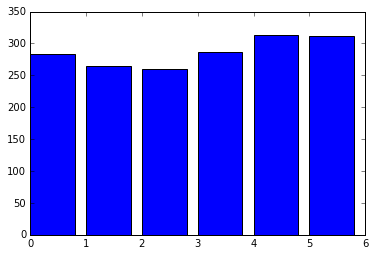

In [34]:
plt.bar(range(6), greedo[greedo.columns[3:9]].sum())
plt.show()

plt.bar(range(6), han[han.columns[3:9]].sum())
plt.show()

There are no differences in ratings between these two group, but the viewership for the "Han" group is more, which could suggest that more people in general just think Han shot first. A quick describe method should confirm this.

In [35]:
print(star_wars["Which character shot first?"].describe())
print(star_wars["Which character shot first?"].value_counts())

count     828
unique      3
top       Han
freq      325
Name: Which character shot first?, dtype: object
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64


## Cleaning Up Columns 15-29
These columns respond to the question of: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.

The columns, in order, correlate to the characters found in the header variable that we saved all the way at the beginning of the code.

In [36]:
print(star_wars.iloc[:,15:29].head())
print(header)

  Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  \
1                                     Very favorably                                                               
2                                                NaN                                                               
3                                 Somewhat favorably                                                               
4                                     Very favorably                                                               
5                                     Very favorably                                                               

          Unnamed: 16         Unnamed: 17           Unnamed: 18  \
1      Very favorably      Very favorably        Very favorably   
2                 NaN                 NaN                   NaN   
3  Somewhat favorably  Somewhat favorably    Somewhat favorably   
4      Very favorably      Very fav

In [37]:
star_wars["Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."].unique()

array(['Very favorably', nan, 'Somewhat favorably',
       'Neither favorably nor unfavorably (neutral)',
       'Somewhat unfavorably', 'Unfamiliar (N/A)', 'Very unfavorably'],
      dtype=object)

Using these codes, we can actually map out the ratings from 1-5 from very unfavorably to very favorably, with 3 being neutral. We can ignore the N/A, NaN columns because they do not provide any extra information and we cannot infer anything from them.

In [38]:
character_map = {
    "Very favorably": 5,
    "Somewhat favorably": 4,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Somewhat unfavorably": 2,
    "Very unfavorably": 1,
    np.NaN: np.NaN,
    "Unfamiliar (N/A)": np.NaN
}

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(character_map)

star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia",
        "Unnamed: 18": "Akakin Skywalker",
        "Unnamed: 19": "Obi Wan",
        "Unnamed: 20": "Emperor Palpatine",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C3P0",
        "Unnamed: 25": "R2D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme",
        "Unnamed: 28": "Yoda",
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,5.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,NaN,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,5.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,4.0,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [39]:
star_wars.iloc[:,15:29].head()

,Han Solo,Luke Skywalker,Princess Leia,Akakin Skywalker,Obi Wan,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C3P0,R2D2,Jar Jar Binks,Padme,Yoda
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
5,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0


In [40]:
star_wars.iloc[:,15:29].describe()

,Han Solo,Luke Skywalker,Princess Leia,Akakin Skywalker,Obi Wan,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C3P0,R2D2,Jar Jar Binks,Padme,Yoda
count,814.000000,825.000000,823.000000,771.000000,808.000000,658.000000,816.000000,672.000000,680.000000,812.000000,820.000000,712.000000,650.000000,816.000000
mean,4.671990,4.580606,4.555286,3.775616,4.632426,3.071429,3.479167,3.636905,3.357353,4.403941,4.569512,2.780899,3.604615,4.629902
std,0.634612,0.688753,0.734312,1.153302,0.709146,1.319358,1.535528,0.956120,1.147555,0.842394,0.738806,1.433878,1.118128,0.731609
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,1.000000,3.000000,4.000000
50%,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,3.000000,5.000000,5.000000,3.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Container object of 14 artists>

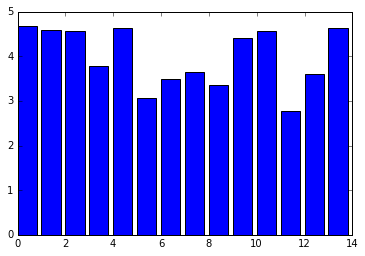

In [41]:
plt.bar(range(14), star_wars[star_wars.columns[15:29]].mean())

Even with a very crude chart, we can see that the respondents most like Han Solo, Luke Skywalker, and Yoda, with Han Solo most of all. They also like Jar Jar Binks the least, even worse than Palpatine! Finally, the most controversial character (the mean closest to 3 - signifying a split in likes and dislikes or neutral) seems to be Palpatine, Darth Vader, or Boba Fett, which makes sense because they were built to be antogonistic/controversial characters. 

In [50]:
star_wars.iloc[:,[20,21,23]].describe()

,Emperor Palpatine,Darth Vader,Boba Fett
count,658.000000,816.000000,680.000000
mean,3.071429,3.479167,3.357353
std,1.319358,1.535528,1.147555
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000
50%,3.000000,4.000000,3.000000
75%,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000


If we wanted to go further, we could probably infer that Darth Vader is the most controversial of the 3 because he boasts a higher standard deviation of almost 1.5. Again, this does make a lot of sense, as he was both "good" and "e 